# Linear regression para uma rela√ß√£o n√£o linear de recursos-alvo

No exerc√≠cio anterior, voc√™ foi solicitado a treinar um modelo de regress√£o linear
em um conjunto de dados onde os `dados` da matriz e o` alvo` vetorial n√£o t√™m um
link linear.

Neste notebook, mostramos que mesmo que a parametriza√ß√£o de modelos lineares
n√£o est√° adaptado nativamente ao problema em quest√£o, ainda √© poss√≠vel fazer
modelos lineares mais expressivos por recursos adicionais de engenharia.

Um pipeline de aprendizado de m√°quina que combina uma engenharia de recursos n√£o linear
etapa seguida por uma etapa de regress√£o linear pode, portanto, ser considerada
modelo de regress√£o n√£o linear como um todo.

Para ilustrar esses conceitos, vamos reutilizar o mesmo conjunto de dados gerado no
exerc√≠cio anterior.

In [1]:
import numpy as np

rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Para facilitar a plotagem, criaremos um dataframe do pandas contendo os dados
e alvo: </p>
</div>

In [2]:
import pandas as pd

full_data = pd.DataFrame({"input_feature": data, "target": target})

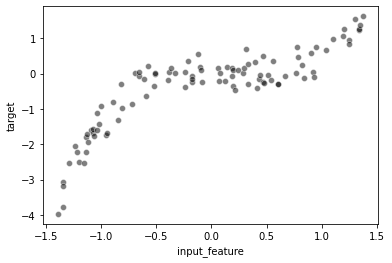

In [3]:
import seaborn as sns

_ = sns.scatterplot(data=full_data, x="input_feature", y="target",
                    color="black", alpha=0.5)

Vamos destacar as limita√ß√µes de ajustar um modelo de regress√£o linear como
feito no exerc√≠cio anterior.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, por conven√ß√£o <tt class = "docutils literal"> dados </tt> (tamb√©m chamado de <tt class = "docutils literal"> X </tt> no scikit-learn
documenta√ß√£o) deve ser uma matriz 2D de forma <tt class = "docutils literal"> (n_samples, n_features) </tt>.
Se <tt class = "docutils literal"> dados </tt> for um vetor 1D, voc√™ precisar√° reformul√°-lo em uma matriz com um
coluna √∫nica se o vetor representa um recurso ou uma √∫nica linha se o
vetor representa uma amostra. </p>
</div>

In [5]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1, 1))
data.shape

(100, 1)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(data, target)
target_predicted = linear_regression.predict(data)

In [7]:
mse = mean_squared_error(target, target_predicted)

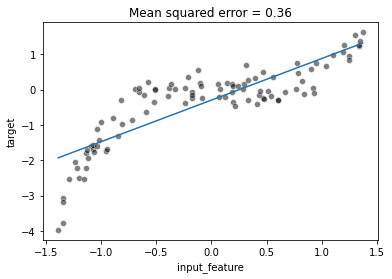

In [8]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Aqui, o coeficiente e a intercepta√ß√£o aprendidos por `LinearRegression` definem o
melhor "linha reta" que se ajusta aos dados. Podemos inspecionar os coeficientes
usando os atributos do modelo aprendidos da seguinte forma:

In [9]:
print(f"weight: {linear_regression.coef_[0]:.2f}, "
      f"intercept: {linear_regression.intercept_:.2f}")

weight: 1.18, intercept: -0.29


√â importante notar que o modelo aprendido n√£o ser√° capaz de lidar com o
rela√ß√£o n√£o linear entre `dados` e` destino` desde modelos lineares
suponha que a rela√ß√£o entre `dados` e` destino` seja linear.

Na verdade, existem 3 possibilidades para resolver este problema:

1. escolher um modelo que possa lidar nativamente com a n√£o linearidade,
2. projetar um conjunto mais rico de recursos, incluindo conhecimento especializado que pode
   ser usado diretamente por um modelo linear simples, ou
3. use um "kernel" para ter uma fun√ß√£o de decis√£o baseada localmente em vez de um
   fun√ß√£o de decis√£o linear global.

Vamos ilustrar rapidamente o primeiro ponto usando um regressor de √°rvore de decis√£o
que pode lidar nativamente com a n√£o linearidade.

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
target_predicted = tree.predict(data)
mse = mean_squared_error(target, target_predicted)

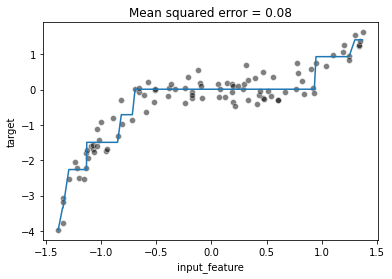

In [11]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Em vez de ter um modelo que pode lidar nativamente com a n√£o linearidade, n√≥s
tamb√©m poderia modificar nossos dados: poder√≠amos criar novos recursos, derivados do
caracter√≠sticas originais, usando algum conhecimento especializado. Neste exemplo, sabemos que
temos uma rela√ß√£o c√∫bica e quadrada entre `dados` e` destino` (porque
geramos os dados).

Na verdade, poder√≠amos criar dois novos recursos (`dados ** 2` e` dados ** 3`) usando
esta informa√ß√£o da seguinte forma. Este tipo de transforma√ß√£o √© chamado de
expans√£o de recurso polinomial:

In [12]:
data.shape

(100, 1)

In [13]:
data_expanded = np.concatenate([data, data ** 2, data ** 3], axis=1)
data_expanded.shape

(100, 3)

In [14]:
linear_regression.fit(data_expanded, target)
target_predicted = linear_regression.predict(data_expanded)
mse = mean_squared_error(target, target_predicted)

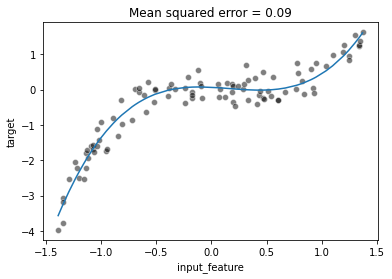

In [15]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Podemos ver que mesmo com um modelo linear, podemos superar a linearidade
limita√ß√£o do modelo, adicionando os componentes n√£o lineares no projeto de
caracter√≠sticas adicionais. Aqui, criamos novos recursos conhecendo a forma como o
alvo foi gerado.

Em vez de criar manualmente esses recursos polinomiais, poderia usar diretamente
[sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Para demonstrar o uso da classe `PolynomialFeatures`, usamos um
pipeline scikit-learn que primeiro transforma os recursos e depois se ajusta ao
modelo de regress√£o.

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression(),
)
polynomial_regression.fit(data, target)
target_predicted = polynomial_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

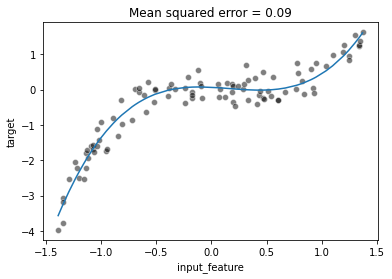

In [17]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Como esperado, observamos que as previs√µes deste `PolynomialFeatures`
pipeline coincidir com as previs√µes do ajuste do modelo linear em engenharia manual
recursos.

A √∫ltima possibilidade √© tornar um modelo linear mais expressivo √© usar um
"n√∫cleo". Em vez de aprender um peso por recurso, como anteriormente
enfatizado, um peso ser√° atribu√≠do por amostra. No entanto, nem todos
amostras ser√£o usadas. Esta √© a base da m√°quina de vetores de suporte
algoritmo.

A defini√ß√£o matem√°tica de "kernels" e "m√°quinas de vetores de suporte" √©
al√©m do escopo deste curso. Encorajamos os leitores interessados com um
treinamento matem√°tico para dar uma olhada no scikit-learn [documenta√ß√£o sobre
SVMs](https://scikit-learn.org/stable/modules/svm.html) para obter mais detalhes.

Para o resto de n√≥s, vamos apenas desenvolver algumas intui√ß√µes sobre o
poder expressivo das m√°quinas de vetores de suporte linear e n√£o linear
kernels ajustando-os no mesmo conjunto de dados.

Primeiro, considere uma m√°quina de vetores de suporte com um kernel linear:

In [18]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
svr.fit(data, target)
target_predicted = svr.predict(data)
mse = mean_squared_error(target, target_predicted)

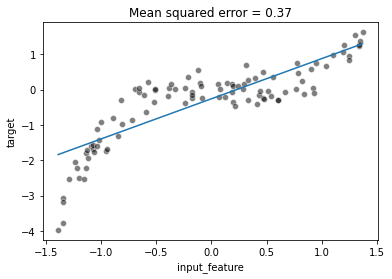

In [19]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

As previs√µes do nosso SVR com um kernel linear est√£o todas alinhadas em uma linha reta
linha. `SVR (kernel =" linear ")` √© de fato mais um exemplo de um modelo linear.

O estimador tamb√©m pode ser configurado para usar um kernel n√£o linear. Ent√£o, pode
aprender uma fun√ß√£o de previs√£o que calcula a intera√ß√£o n√£o linear entre
amostras para as quais queremos fazer uma previs√£o e amostras selecionadas do
conjunto de treinamento.

O resultado √© outro tipo de modelo de regress√£o n√£o linear com uma
expressividade como nosso pipeline de regress√£o polinomial anterior:

In [20]:
svr = SVR(kernel="poly", degree=3)
svr.fit(data, target)
target_predicted = svr.predict(data)
mse = mean_squared_error(target, target_predicted)

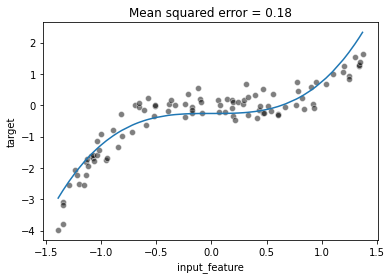

In [21]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Os m√©todos de kernel, como SVR, s√£o muito eficientes para conjuntos de dados pequenos e m√©dios.

Para conjuntos de dados maiores com `n_samples >> 10_000`, √© frequentemente computacionalmente
mais eficiente para realizar expans√£o expl√≠cita de recursos usando
`PolynomialFeatures` ou outros transformadores n√£o lineares do scikit-learn como
Como
[KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)
ou
[Nystroem](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html).

Aqui, novamente, referimos o leitor interessado √† documenta√ß√£o para obter uma
defini√ß√£o adequada desses m√©todos. O que se segue apenas d√° uma vis√£o intuitiva
vis√£o geral das previs√µes que obter√≠amos usando em nosso conjunto de dados de brinquedos:

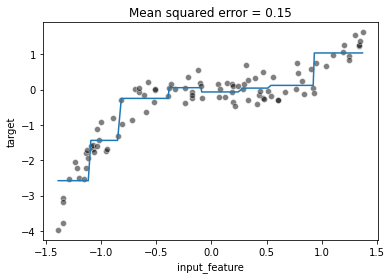

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=8), LinearRegression(),
)
binned_regression.fit(data, target)
target_predicted = binned_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

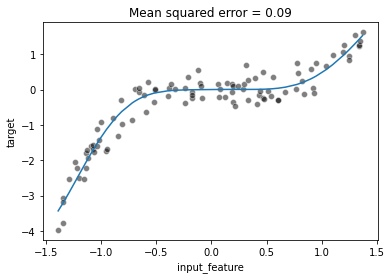

In [23]:
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(n_components=5), LinearRegression(),
)
nystroem_regression.fit(data, target)
target_predicted = nystroem_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

# üìù Exerc√≠cio M4.03

Em todos os notebooks anteriores, usamos apenas um √∫nico recurso em `dados`. Mas n√≥s
j√° mostramos que poder√≠amos adicionar novos recursos para tornar o modelo mais
expressivo derivando novos recursos, com base no recurso original.

O objetivo deste notebook √© treinar um algoritmo de regress√£o linear em um
conjunto de dados mais do que um √∫nico recurso.

Carregaremos um conjunto de dados sobre os pre√ßos das casas na Calif√≥rnia.
O conjunto de dados consiste em 8 recursos relacionados √† demografia e geografia de
distritos da Calif√≥rnia e o objetivo √© prever o pre√ßo m√©dio da casa de
cada distrito. Usaremos todos os 8 recursos para prever o alvo, a mediana
pre√ßo da casa.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Se voc√™ quiser uma vis√£o geral mais aprofundada sobre este conjunto de dados, pode consultar o
Ap√™ndice - se√ß√£o de descri√ß√£o dos conjuntos de dados no final deste MOOC.</p>
</div>

In [24]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

Agora √© sua vez de treinar um modelo de regress√£o linear neste conjunto de dados.
Voc√™ vai precisar:
* criar um modelo de regress√£o linear;
* execute uma valida√ß√£o cruzada com 10 dobras e use o erro absoluto m√©dio
  (MAE) como m√©trica. Certifique-se de retornar os estimadores ajustados;
* calcule a m√©dia e o padr√£o do MAE em milhares de d√≥lares (k $);
* mostra os valores dos coeficientes para cada caracter√≠stica usando um boxplot por
  inspecionar o modelo ajustado retornado da valida√ß√£o cruzada. Dica: voc√™
  use a fun√ß√£o
  [`df.plot.box ()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)
  para tra√ßar um gr√°fico de caixa.

Agora √© sua vez de treinar um modelo de regress√£o linear neste conjunto de dados. Primeiro, crie um modelo de regress√£o linear.

In [25]:
# solution
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

Execute uma valida√ß√£o cruzada com 10 dobras e use o erro absoluto m√©dio (MAE) como m√©trica. Certifique-se de retornar os estimadores ajustados.

In [26]:
# solution
from sklearn.model_selection import cross_validate

cv_results = cross_validate(linear_regression, data, target,
                            scoring="neg_mean_absolute_error",
                            return_estimator=True, cv=10, n_jobs=2)

Calcule a m√©dia e o padr√£o do MAE em milhares de d√≥lares (k $).

In [27]:
# solution
print(f"Mean absolute error on testing set: "
      f"{-cv_results['test_score'].mean():.3f} k$ +/- "
      f"{cv_results['test_score'].std():.3f}")

Mean absolute error on testing set: 54.452 k$ +/- 9.109


Inspecione o modelo ajustado usando um gr√°fico de caixa para mostrar a distribui√ß√£o de valores para os coeficientes retornados da valida√ß√£o cruzada. Dica: use a fun√ß√£o df.plot.box () para criar um gr√°fico de caixa.

In [28]:
# solution
import pandas as pd

weights = pd.DataFrame(
    [est.coef_ for est in cv_results["estimator"]], columns=data.columns)

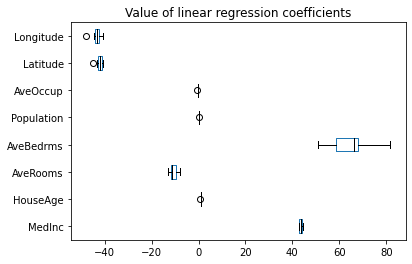

In [29]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights.plot.box(color=color, vert=False)
_ = plt.title("Value of linear regression coefficients")